<a href="https://colab.research.google.com/github/fabriciocarraro/keras-fashion-mnist/blob/main/Deep_Learning_Keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [131]:
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

Loading dataset

In [132]:
dataset = keras.datasets.fashion_mnist
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

Data exploration

In [133]:
X_train.shape

(60000, 28, 28)

In [134]:
len(X_test)

10000

In [135]:
print(y_train.min())
print(y_train.max())

0
9


In [136]:
classifications = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boots']

Text(0.5, 1.0, '9')

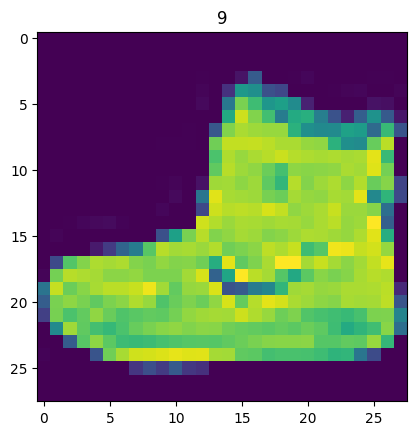

In [137]:
plt.imshow(X_train[0])
plt.title(y_train[0])

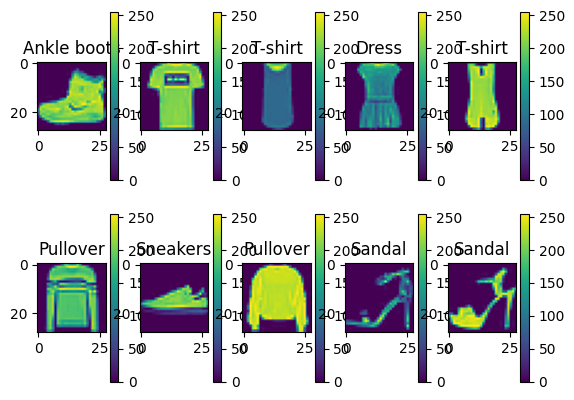

In [138]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(X_train[imagem])
  plt.colorbar()
  plt.title(classifications[y_train[imagem]])

Normalizing the images

In [139]:
X_train = X_train/float(255)

Creating, compiling, training and normalizing the model



In [140]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5222 - accuracy: 0.8124 - val_loss: 0.4150 - val_accuracy: 0.8477
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3811 - accuracy: 0.8612 - val_loss: 0.3637 - val_accuracy: 0.8662
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3441 - accuracy: 0.8739 - val_loss: 0.3409 - val_accuracy: 0.8748
Epoch 4/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3204 - accuracy: 0.8814 - val_loss: 0.3557 - val_accuracy: 0.8708
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2997 - accuracy: 0.8881 - val_loss: 0.3326 - val_accuracy: 0.8808


Saving the model and loading the trained model

In [141]:
model.save('model.h5')
saved_model = load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizing accuracy and loss per epoch

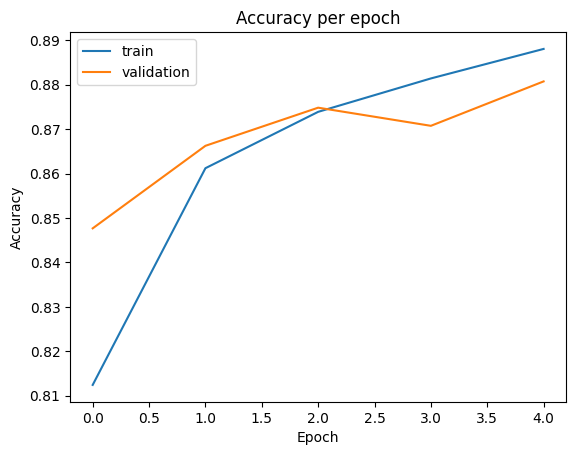

In [142]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

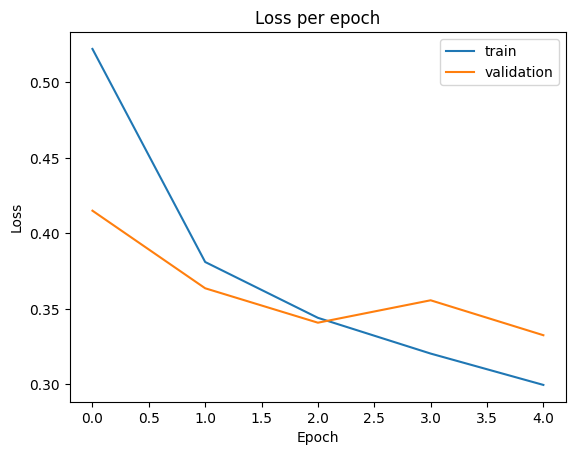

In [143]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

Testing the model and the saved model

In [144]:
tests = model.predict(X_test)
print('Test loss:', np.argmax(tests[1]))
print('Image classification:', y_test[1])

tests_saved_model = saved_model.predict(X_test)
print('Test result:', np.argmax(tests_saved_model[1]))
print('Image classification:', y_test[1])

313/313 [==============================] - 1s 2ms/step
Test loss: 2
Image classification: 2
313/313 [==============================] - 1s 2ms/step
Test result: 2
Image classification: 2


Evaluating the model

In [145]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 57.7243 - accuracy: 0.8410
Test loss: 57.7242546081543
Test accuracy: 0.8410000205039978
